In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pathlib

In [ ]:
# --- Params ---
data_dir = pathlib.Path("data/101_ObjectCategories") 
img_size = (224, 224)   
batch_size = 32
seed = 42
train_val_split = 0.2

# --- Datasets: train/val/test from folder structure ---
train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=train_val_split,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
)

val_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
)


In [9]:
class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

Classes: ['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'sn

In [ ]:
def build_model(input_shape=img_size + (3,), num_classes=num_classes):
    
    inputs = keras.Input(shape=input_shape)

    x = layers.Rescaling(1./255)(inputs)

    x = layers.Conv2D(32, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Dropout(0.25)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)

    return model



In [34]:
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]

model = build_model()
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=loss,
    metrics=metrics,
)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_7 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 102)            │        26,214 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,809,830 (98.46 MB)

 Trainable params: 25,809,830 (98.46 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20


2025-09-01 11:50:25.798596: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 205520896 exceeds 10% of free system memory.
2025-09-01 11:50:26.651881: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 205520896 exceeds 10% of free system memory.


  1/229 ━━━━━━━━━━━━━━━━━━━━ 10:06 3s/step - accuracy: 0.0312 - loss: 4.6112

2025-09-01 11:50:26.890773: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 205520896 exceeds 10% of free system memory.
2025-09-01 11:50:27.708521: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 205520896 exceeds 10% of free system memory.


  2/229 ━━━━━━━━━━━━━━━━━━━━ 3:59 1s/step - accuracy: 0.0234 - loss: 5.3294 

2025-09-01 11:50:27.935733: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 205520896 exceeds 10% of free system memory.


229/229 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.2489 - loss: 3.7084 - val_accuracy: 0.3605 - val_loss: 2.9904
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.4001 - loss: 2.7606 - val_accuracy: 0.4480 - val_loss: 2.4968
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step - accuracy: 0.4943 - loss: 2.1671 - val_accuracy: 0.5170 - val_loss: 2.1726
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.5854 - loss: 1.6746 - val_accuracy: 0.5591 - val_loss: 1.9664
Epoch 5/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.6736 - loss: 1.2482 - val_accuracy: 0.5580 - val_loss: 2.0389
Epoch 6/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.7366 - loss: 0.9741 - val_accuracy: 0.5514 - val_loss: 2.0640
Epoch 7/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.7951 - loss: 0.7526 - val_accuracy: 0.5629 - val_loss: 2.0664
Epoch 8/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 294s 1s/step - accuracy: 0.8270 - loss: 0.5994 - val_accuracy: 0.561

In [24]:

def graph_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot accuracy on left y-axis
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Accuracy", color="tab:blue")
    ax1.plot(epochs, acc, label="Train Acc", color="tab:blue", linestyle="--")
    ax1.plot(epochs, val_acc, label="Val Acc", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # Add second y-axis for loss
    ax2 = ax1.twinx()
    ax2.set_ylabel("Loss", color="tab:red")
    ax2.plot(epochs, loss, label="Train Loss", color="tab:red", linestyle="--")
    ax2.plot(epochs, val_loss, label="Val Loss", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    # Title + legends
    fig.suptitle("Training History: Accuracy & Loss")
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

    plt.grid(True)
    plt.show()

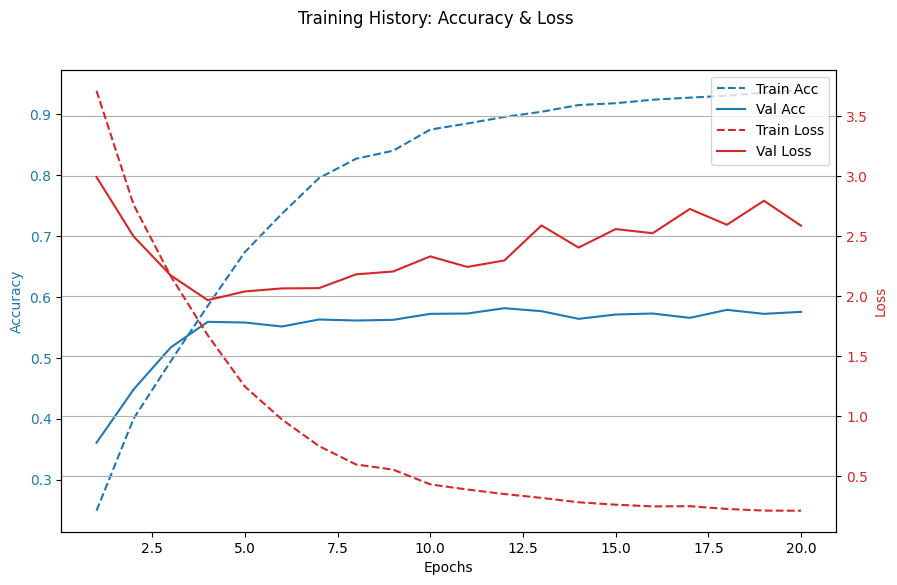

In [25]:
graph_history(history)

* This is serverly overfitting. I am going to add more Dropout layers and batch normalization to every hidden layers.

In [44]:
def build_model2(input_shape=img_size + (3,), num_classes=num_classes):
    
    inputs = keras.Input(shape=input_shape)

    x = layers.Rescaling(1./255)(inputs)

    x = layers.Conv2D(32, 3, padding="same")(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(128, 3, padding="same")(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Dropout(0.25)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)

    return model



Epoch 1/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.1409 - loss: 4.2434 - val_accuracy: 0.2139 - val_loss: 3.6468 - learning_rate: 0.0010
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.2873 - loss: 3.3992 - val_accuracy: 0.3403 - val_loss: 3.1264 - learning_rate: 0.0010
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.3576 - loss: 2.9999 - val_accuracy: 0.4174 - val_loss: 2.7564 - learning_rate: 0.0010
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.4112 - loss: 2.6346 - val_accuracy: 0.4562 - val_loss: 2.4889 - learning_rate: 0.0010
Epoch 5/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.4446 - loss: 2.3533 - val_accuracy: 0.4743 - val_loss: 2.3693 - learning_rate: 0.0010
Epoch 6/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.4900 - loss: 2.1288 - val_accuracy: 0.5044 - val_loss: 2.2495 - learning_rate: 0.0010
Epoch 7/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - accuracy: 0.5193 - loss: 1.

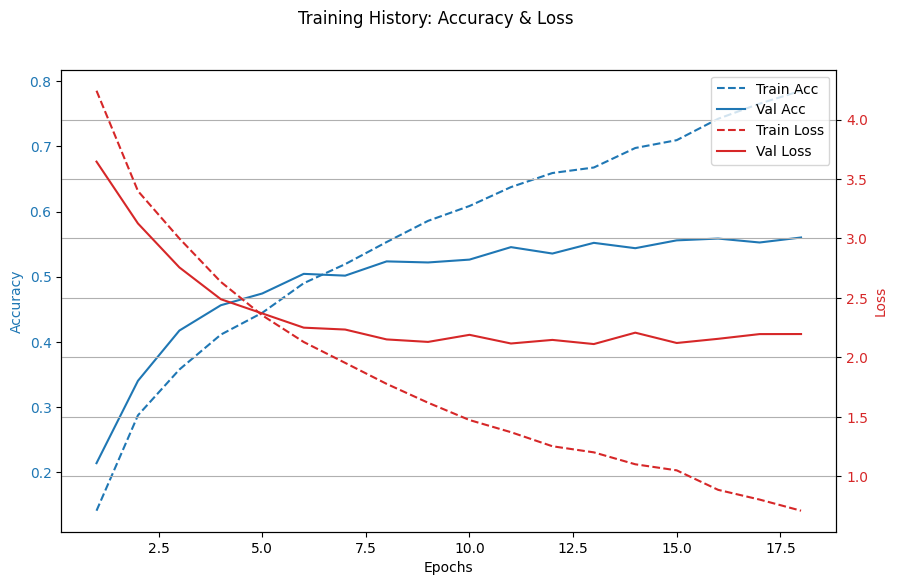

In [45]:
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
model2 = build_model2()
model2.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=loss,
    metrics=metrics,
)
history2 = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss"),
        keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, monitor="val_loss"),
    ],
)

graph_history(history2)


* the gap is closer i guess...

Epoch 1/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.1353 - loss: 4.3621 - val_accuracy: 0.2325 - val_loss: 3.7378 - learning_rate: 0.0010
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 401s 2s/step - accuracy: 0.2458 - loss: 3.6122 - val_accuracy: 0.3173 - val_loss: 3.3416 - learning_rate: 0.0010
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 471s 2s/step - accuracy: 0.3066 - loss: 3.2442 - val_accuracy: 0.3742 - val_loss: 3.0184 - learning_rate: 0.0010
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 471s 2s/step - accuracy: 0.3356 - loss: 3.0234 - val_accuracy: 0.3933 - val_loss: 2.8759 - learning_rate: 0.0010
Epoch 5/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 463s 2s/step - accuracy: 0.3704 - loss: 2.8493 - val_accuracy: 0.4141 - val_loss: 2.7031 - learning_rate: 0.0010
Epoch 6/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 410s 2s/step - accuracy: 0.3898 - loss: 2.6912 - val_accuracy: 0.4398 - val_loss: 2.5310 - learning_rate: 0.0010
Epoch 7/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 470s 2s/step - accuracy: 0.3934 - loss: 2.

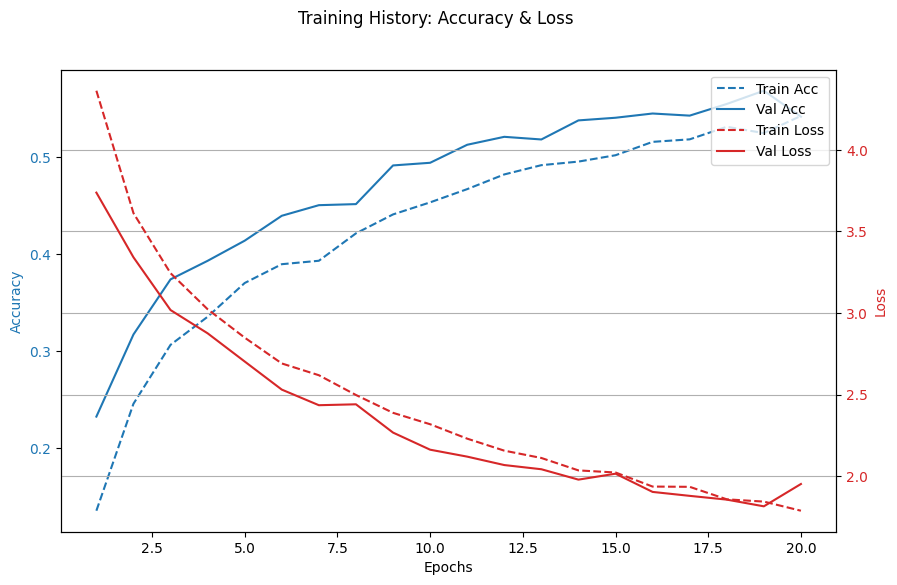

In [47]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
])

def build_model3(input_shape=img_size + (3,), num_classes=num_classes):
    
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)

    x = layers.Rescaling(1./255)(x)

    x = layers.Conv2D(32, 3, padding="same")(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(128, 3, padding="same")(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Dropout(0.25)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)

    return model

model3 = build_model3()
model3.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history3 = model3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss"),
        keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, monitor="val_loss"),
    ],
)

graph_history(history3)

* Improvement on overfitting for sure. I think i will continue to train this model and increase its learning rate

In [55]:
model.save("my_model.keras")

Epoch 1/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5506 - loss: 1.7515
Epoch 1: val_loss improved from None to 1.78267, saving model to my_best_model.keras
229/229 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.5414 - loss: 1.7846 - val_accuracy: 0.5749 - val_loss: 1.7827 - learning_rate: 0.0010
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5576 - loss: 1.7225
Epoch 2: val_loss did not improve from 1.78267
229/229 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - accuracy: 0.5499 - loss: 1.7679 - val_accuracy: 0.5673 - val_loss: 1.8018 - learning_rate: 0.0010
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5746 - loss: 1.7064
Epoch 3: val_loss improved from 1.78267 to 1.76722, saving model to my_best_model.keras
229/229 ━━━━━━━━━━━━━━━━━━━━ 457s 2s/step - accuracy: 0.5657 - loss: 1.7201 - val_accuracy: 0.5717 - val_loss: 1.7672 - learning_rate: 0.0010
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5659 - loss: 1.6696
Epoch 4: val_l

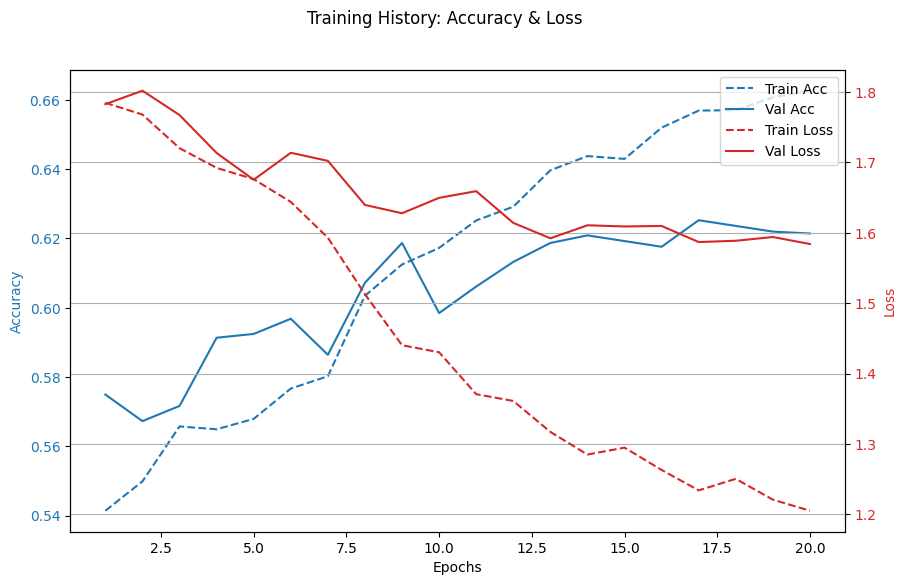

In [54]:
history4 = model3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[
        keras.callbacks.EarlyStopping(
            patience=5, 
            restore_best_weights=True, 
            monitor="val_loss"
            ),
        keras.callbacks.ReduceLROnPlateau(
            patience=2, 
            factor=0.5, 
            monitor="val_loss"
            ),
        keras.callbacks.ModelCheckpoint(
            filepath="my_best_model.keras",  
            monitor="val_loss",           
            save_best_only=True,         
            mode="min",                  
            verbose=1
            ),
    ],
)

graph_history(history4)